In [4]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler as sc
from sklearn.decomposition import PCA

In [5]:
#read csv file

df = pd.read_csv("data_EpilepticSeizure.csv") 

# df.head()

1- First, split the data into training and testing by using the 70% for training and 30% for testing. Then, create a decision tree classifier model using the training dataset.

In [26]:
#separate features and labels using indexes

X,y= df.iloc[:, 1:179 ], df.iloc[:,-1].values
    #x=all columns from 1-178. drop the first column
    #y=last column with labels

#split data 70:30 for train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3,random_state=2)
X_train

sc = StandardScaler()
X_train =  pd.DataFrame(sc.fit_transform(X_train))  
X_test =  pd.DataFrame(sc.transform(X_test))
y_train=pd.DataFrame(y_train)
# X_train

2- Change the size of the tree from 1 to 30 by changing max_depth parameter, and plot the training accuracy vs testing accuracy. Explain if there is an overfitting while the tree size exceeds the certain number.

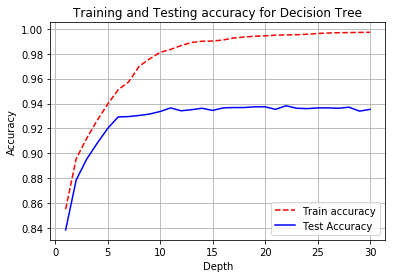

In [27]:
depth=[]
for i in range(1,31):
    depth.append(i)
    
train_score=[]
test_score=[]

for i in range(1,31):
    tree = DecisionTreeClassifier(max_depth=i,random_state=45)
    tree.fit(X_train, y_train)
    
    train_score.append(tree.score(X_train, y_train))
    test_score.append(tree.score(X_test, y_test))

plt.plot(depth, train_score, 'r--')
plt.plot(depth, test_score, 'b-')
plt.legend(['Train accuracy', 'Test Accuracy'])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("Training and Testing accuracy for Decision Tree")
plt.grid(True)
plt.show()

We can tell a model is overfitting when it's training accuracy is much higher than its testing accuracy.From the graph above, the difference between the two accuracies gradually increases and plateaus after a depth of 5. At a depth of 5, the decision tree has an equal accuracy for both training and testing data of 0.92. Therefore, settling on depth=5 would be a sound decision for the model

3- Create a 2 dimensional plot of the data. You can pick any 2 attributes for the plotting purpose.
Plot positive and negative classes in different color,and check for any noticeable class separation.

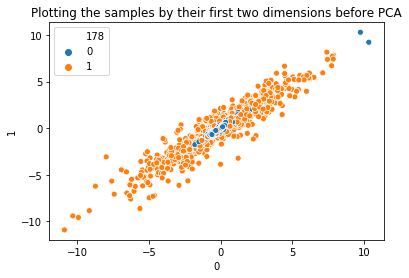

In [38]:

new_df=pd.concat((X_train_s,y_train), axis=1, ignore_index=True) #ignore index so that y_train's index isn't set 0

new_df.head()

g=sns.scatterplot(x="0", y="1", hue="178",data=new_df.rename(columns=lambda x: str(x)))
plt.title('Plotting the samples by their first two dimensions before PCA')

plt.show()



Non-Eplipetic class, shown by class 0 and color blue, is barely visible in the scatterplot above

4- Apply PCA and then re-plot the data using only first two dimension of the transformed data.
Again check for any noticeable class separation. Also, compare this 2D plot with the previous one. 


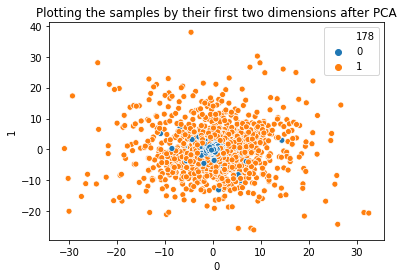

In [39]:
pca = PCA()  
X_train_p =  pd.DataFrame(pca.fit_transform(X_train_s))  
X_test_p =  pd.DataFrame(pca.transform(X_test_s))

pca_df=pd.concat((X_train_p,y_train), axis=1, ignore_index=True) 


sns.scatterplot(x="0", y="1", hue="178",data=pca_df.rename(columns=lambda x: str(x)))
Fplt.title('Plotting the samples by their first two dimensions after PCA')
plt.show()



We see a noticeable difference from the first scatterplot. The shape of the graph has changed after PCA and we also see more of Non-epileptic Class

5- Plot explained_variance_ratio using the eigenvalues. For help please refer to the jupyter notebook 
for PCA uploaded to moodle.

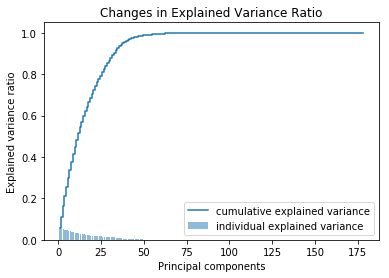

In [45]:
evr=pca.explained_variance_ratio_ 

plt.bar(range(1, 179), evr, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1, 179), np.cumsum(evr), where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Changes in Explained Variance Ratio')
plt.show()

The data we're working with has a large dimension. Explained variance ratio shows us how much new information/variance is learned with every new principal component. From the grpah above, we see the information gain stops after about the 50th principal component. But also, at around the same point, the variance captured is over 90%. Therefore, its safe to assume that we can retain around 90% varaince in data from 50 principal components

6- Then, create another decision tree for the transformed data (data after applying PCA). While creating decision tree, initially use all of the dimensions of the PCA applied data. Then based on the explained_variance_ratio plot, use only the significant dimensions which has high variance. Check whether the performance of the decision tree decreases or increases while you don't use all of the dimensions. 

In [53]:

tree = DecisionTreeClassifier(max_depth=5,random_state=0)
tree.fit(X_train_p, y_train)

pca_train_score=[]
pca_test_score=[]

pca_train_score.append(tree.score(X_train_p, y_train))
pca_test_score.append(tree.score(X_test_p, y_test))

# print("PCA training score is.",format(str( pca_train_score)))
print("PCA testing score using original dimension is.",format(str( pca_test_score)))


PCA testing score using original dimension is. [0.9423188405797102]


In [54]:
pca = PCA(n_components=50)  
X_train_p2 =  pd.DataFrame(pca.fit_transform(X_train_s))  
X_test_p2 =  pd.DataFrame(pca.transform(X_test_s))

print("Original Shape/Dimension:",format(str(X_train_p.shape)))
print("Reduced Shape/Dimension:",format(str(X_train_p2.shape)))

depth=[1,2,3,4,5,6,7,8,9,10,11,12]
tree = DecisionTreeClassifier(max_depth=5,random_state=0)
tree.fit(X_train_p2, y_train)

pca_train_score2=[]
pca_test_score2=[]

pca_train_score2.append(tree.score(X_train_p2, y_train))
pca_test_score2.append(tree.score(X_test_p2, y_test))

# print("PCA training score is.",format(str( pca_train_score2)))
print("PCA testing score after reducing dimension is.",format(str( pca_test_score2)))


Original Shape/Dimension: (8050, 178)
Reduced Shape/Dimension: (8050, 50)
PCA testing score after reducing dimension is. [0.9457971014492753]


7- Compare the performance scores of the decision trees created by the initial raw data and decision trees created by the data after applying PCA.

The decision tree's performance saw a slight improvement after applying PCA. While, the change isn't massive, it still cuts down compuation time